### PySparkSession Creation

In [4]:
#Importing Spark Session and important libraries that need to perform things in project

from pyspark.sql import SparkSession
from pyspark.sql import DataFrame
from pyspark.sql.types import StringType
from pyspark.sql.functions import col, date_format, regexp_replace, when, udf, year



### Session Builder

In [5]:
#Spark Session Builder that builds the Session in which we work upon

spark = SparkSession.builder \
    .appName("ExceltoDataFrame") \
    .config("spark.jars.packages", "com.crealytics:spark-excel_2.12:3.4.1_0.19.0") \
    .getOrCreate()

:: loading settings :: url = jar:file:/opt/bitnami/spark/jars/ivy-2.5.1.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /root/.ivy2/cache
The jars for the packages stored in: /root/.ivy2/jars
com.crealytics#spark-excel_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-c7e0ecf7-947d-4ef7-9f2c-4df8a326d4e6;1.0
	confs: [default]
	found com.crealytics#spark-excel_2.12;3.4.1_0.19.0 in central
	found org.apache.poi#poi;5.2.3 in central
	found commons-codec#commons-codec;1.15 in central
	found org.apache.commons#commons-collections4;4.4 in central
	found org.apache.commons#commons-math3;3.6.1 in central
	found com.zaxxer#SparseBitSet;1.2 in central
	found org.apache.poi#poi-ooxml;5.2.3 in central
	found org.apache.poi#poi-ooxml-lite;5.2.3 in central
	found org.apache.xmlbeans#xmlbeans;5.1.1 in central
	found com.github.virtuald#curvesapi;1.07 in central
	found com.norbitltd#spoiwo_2.12;2.2.1 in central
	found com.github.tototoshi#scala-csv_2.12;1.3.10 in central
	found com.github.pjfanning#excel-streaming-reader;4.0.5 in central
	found com.gi

# There are two Different Source files for different tables data one is excel and other is JSON

In [6]:
#Things for Excel file

# File path to the Excel file
excel_file = "/spark-data/Capstone_Project/data.xlsx"

# Sheet names (replace these with your actual sheet names)
sheet_names = ["data", "product", "customer"]

# Dictionary to hold DataFrames
dfs = {}

In [7]:
#This is the logic for getting all the sheets into dataframe that are present into a excel file

# Loop through each sheet and create a DataFrame
for sheet in sheet_names:
    df = spark.read.format("com.crealytics.spark.excel") \
        .option("header", "true") \
        .option("inferSchema", "true") \
        .option("dataAddress", f"'{sheet}'!A1") \
        .load(excel_file)
    # Store DataFrame in the dictionary with the sheet name as the key
    dfs[sheet] = df
# Access the DataFrames by sheet name
df_data = dfs["data"]
df_product = dfs["product"]
df_customer = dfs["customer"]

In [8]:
df_customer = dfs["customer"]

In [9]:
df_data.show(20)

+--------+-----------+-------------------+------------+--------------------+--------------------+
|order_id|customer_id|         order_date|total_amount|    shipping_address|     billing_address|
+--------+-----------+-------------------+------------+--------------------+--------------------+
|     1.0|      462.0|2019-08-26 00:00:00|      4007.0|60585 Moore Overp...|775 Roberson Knol...|
|     2.0|     2820.0|2021-04-22 00:00:00|      7240.0|3278 Price Isle\n...|2055 Curry Street...|
|     3.0|     1934.0|2024-02-21 00:00:00|      8318.0|Unit 8425 Box 079...|USNV Strong\nFPO ...|
|     4.0|     2694.0|2021-01-14 00:00:00|      4992.0|5566 Brittany Sta...|524 Allen Shoal S...|
|     5.0|      134.0|2020-03-14 00:00:00|      5385.0|4289 Michael Esta...|38637 Cheryl Junc...|
|     6.0|     4651.0|2020-12-30 00:00:00|      3512.0|83184 Shelly Land...|80329 Dawn Road S...|
|     7.0|     1696.0|2023-05-30 00:00:00|      4592.0|7127 Arroyo Land\...|787 Smith Islands...|
|     8.0|     1969.

In [8]:
df_product.show()

+----------+-------------+---------+-----+--------------------+---------+
|product_id| product_name| category|price|         description|inventory|
+----------+-------------+---------+-----+--------------------+---------+
|       1.0|          bag|       no|448.0|Summer now health...|    655.0|
|       2.0|        happy|   answer|844.0|Employee discuss ...|    230.0|
|       3.0|         same|      his|681.0|Million mother pu...|    831.0|
|       4.0|      prevent|   around| 34.0|Because under mea...|    804.0|
|       5.0|        quite|   summer|663.0|Approach Mr task ...|    351.0|
|       6.0|        which|  purpose|386.0|Leave charge mode...|     10.0|
|       7.0|       beyond|   beyond|879.0|Shoulder power in...|    282.0|
|       8.0|     although|     home|650.0|Exactly continue ...|    818.0|
|       9.0|environmental| although|  7.0|Really admit kind...|    128.0|
|      10.0|       assume|professor|945.0|Bar truth here gr...|    168.0|
|      11.0|      usually|   figure|43

In [9]:
df_customer.show()

+-----------+-----------+---------+--------------------+--------------------+-----------------+-------------+--------+-------------------+
|customer_id| first_name|last_name|               email|        phone_number|             city|        state|zip_code|         birth_date|
+-----------+-----------+---------+--------------------+--------------------+-----------------+-------------+--------+-------------------+
|        1.0|    Crystal|  Edwards|mcmahonemily@exam...|        511.782.4381|    Fergusonville|         Iowa| 91344.0|1995-02-28 00:00:00|
|        2.0|   Jennifer|    Jones|douglasedwards@ex...|          9187202495|     Jenniferport|   New Jersey| 59371.0|1951-01-27 00:00:00|
|        3.0|  Catherine|    Crane|douglaskevin@exam...|  (381)601-2272x7972|  Jenniferchester|West Virginia| 49812.0|1966-10-07 00:00:00|
|        4.0|     Lauren|    Irwin|aguirresteven@exa...|    001-707-942-4829|      New Melissa|     Michigan| 17279.0|1936-07-28 00:00:00|
|        5.0|Christopher|  

### Json Files Loading in df

In [10]:
json_file = "/spark-data/Capstone_Project/data.json"

In [11]:
# Load the JSON data into a single Spark DataFrame, handling multiline JSON
df_json = spark.read.format("json") \
    .option("multiline", "true") \
    .json(json_file)


In [12]:
#Extracting both tables from json file

# Extract 'orders' and 'reviews' into separate DataFrames
df_order = df_json.selectExpr("explode(orders) as order").select("order.*")
df_review = df_json.selectExpr("explode(reviews) as review").select("review.*")

In [13]:
columns_order = ["order_item_id", "order_id", "product_id", "quantity", "price"]
columns_review = ["review_id", "customer_id", "product_id", "rating", "review_text", "review_date"]

df_order = df_order.select(*columns_order)
df_review = df_review.select(*columns_review)

In [14]:
df_order.show()

+-------------+--------+----------+--------+-----+
|order_item_id|order_id|product_id|quantity|price|
+-------------+--------+----------+--------+-----+
|            1|     868|      1571|       7|   70|
|            2|    3151|      3809|      -3|    8|
|            3|    1582|      4896|       8|   32|
|            4|    2578|      2712|       4|   64|
|            5|    2792|      1111|       4|   53|
|            6|    1257|      2874|       1|   69|
|            7|    2389|      2670|       9|   40|
|            8|    2013|      3779|       6|   39|
|            9|    4272|      3109|       5|   15|
|           10|    1260|      2110|       8|   21|
|           11|    3617|      3350|       1|   27|
|           12|    1479|      2917|       9|   96|
|           13|    1405|      1480|       5|   61|
|           14|    4526|      4686|       5|   69|
|           15|    2513|      3146|       8|    8|
|           16|    2346|      4182|       5|   92|
|           17|    3988|       

In [18]:
df_review.show()

+---------+-----------+----------+------+--------------------+-----------+
|review_id|customer_id|product_id|rating|         review_text|review_date|
+---------+-----------+----------+------+--------------------+-----------+
|        1|       2522|      4663|     3|Home create anyon...| 2022-12-20|
|        2|       2181|      2645|     3|Skill herself opt...| 2024-07-05|
|        3|       3935|      1699|     3|Public everyone s...| 2024-05-06|
|        4|       3453|      1360|     1|Level land majori...| 2023-11-05|
|        5|       2999|      4883|     3|Treat fine now di...| 2024-03-03|
|        6|        863|      3544|     2|Land despite buy ...| 2023-06-02|
|        7|       2348|      1853|     1|Ground again goal...| 2023-11-11|
|        8|       2388|      1652|     3|Community materia...| 2022-11-29|
|        9|       4486|       632|     4|Goal after color ...| 2023-03-31|
|       10|       1379|      2399|     5|Beyond coach meet...| 2024-02-11|
|       11|        309|  

### All DataFrames

1. df_data
2. df_product 
3. df_customer
4. df_review
5. df_order

# Now Performing Transformation on All DataFrames

# Transforming df_data

### Handling some basic commam operation on all dataframe like Null value, duplicates records

In [15]:
#Function for removing Null values and "null" string from the dataframe on all column


def replace_nulls_with_na(df):
    
    df = df.na.fill("Not Available")
        
    # Replace "null" strings with "Not Available"
    for col_name in df.columns:
        df = df.withColumn(
            col_name, 
            when(col(col_name) == "null", "Not Available")
            .otherwise(col(col_name))
        )   
    
    return df



In [20]:
# df_customer = replace_nulls_with_na(df_customer)

In [16]:
#Appling null value replace function on all df
df_customer = replace_nulls_with_na(df_customer)
df_data = replace_nulls_with_na(df_data)
df_order = replace_nulls_with_na(df_order)
df_product = replace_nulls_with_na(df_product)
df_review = replace_nulls_with_na(df_review)

In [17]:
#Removing Duplicates Records from the dataframe for ensuring data is not redundent 

def remove_duplicates(df: DataFrame) -> DataFrame:
    # Remove duplicate records
    df_cleaned = df.dropDuplicates()
    
    return df_cleaned

In [18]:
#Appling remove duplicate function on all df
df_customer = remove_duplicates(df_customer)
df_data = remove_duplicates(df_data)
df_order = remove_duplicates(df_order)
df_product = remove_duplicates(df_product)
df_review = remove_duplicates(df_review)

In [19]:
df_data.count()

5000

# Start Transforming the Data Table

In [20]:
df_data.show(5)

+--------+-----------+-------------------+------------+--------------------+--------------------+
|order_id|customer_id|         order_date|total_amount|    shipping_address|     billing_address|
+--------+-----------+-------------------+------------+--------------------+--------------------+
|   264.0|     2830.0|2022-08-03 00:00:00|      3566.0|32138 Bryan Court...|USNS Rodriguez\nF...|
|   159.0|     4390.0|2022-11-15 00:00:00|      9637.0|068 Michael Rest\...|06153 Robin Shoal...|
|   326.0|      702.0|2019-11-27 00:00:00|      4634.0|44979 Stephanie G...|121 Cynthia Coves...|
|   370.0|     2244.0|2024-01-12 00:00:00|      8065.0|75425 Jermaine Gr...|983 Miller Rapids...|
|   398.0|     4180.0|2021-05-01 00:00:00|      9957.0|1603 Nicholas Lan...|63827 Bush Haven\...|
+--------+-----------+-------------------+------------+--------------------+--------------------+
only showing top 5 rows



In [21]:
#Remove decimals from order_id and customer_id


df_data = df_data.withColumn("order_id", col("order_id").cast("int")) \
               .withColumn("customer_id", col("customer_id").cast("int"))

In [22]:
df_data.show(5)

+--------+-----------+-------------------+------------+--------------------+--------------------+
|order_id|customer_id|         order_date|total_amount|    shipping_address|     billing_address|
+--------+-----------+-------------------+------------+--------------------+--------------------+
|     264|       2830|2022-08-03 00:00:00|      3566.0|32138 Bryan Court...|USNS Rodriguez\nF...|
|     159|       4390|2022-11-15 00:00:00|      9637.0|068 Michael Rest\...|06153 Robin Shoal...|
|     326|        702|2019-11-27 00:00:00|      4634.0|44979 Stephanie G...|121 Cynthia Coves...|
|     370|       2244|2024-01-12 00:00:00|      8065.0|75425 Jermaine Gr...|983 Miller Rapids...|
|     398|       4180|2021-05-01 00:00:00|      9957.0|1603 Nicholas Lan...|63827 Bush Haven\...|
+--------+-----------+-------------------+------------+--------------------+--------------------+
only showing top 5 rows



In [23]:
#Formate the order_date Column int yyyy-MM-dd

df_data = df_data.withColumn("order_date", date_format("order_date", "yyyy-MM-dd"))

In [24]:
df_data.show(5)

+--------+-----------+----------+------------+--------------------+--------------------+
|order_id|customer_id|order_date|total_amount|    shipping_address|     billing_address|
+--------+-----------+----------+------------+--------------------+--------------------+
|     264|       2830|2022-08-03|      3566.0|32138 Bryan Court...|USNS Rodriguez\nF...|
|     159|       4390|2022-11-15|      9637.0|068 Michael Rest\...|06153 Robin Shoal...|
|     326|        702|2019-11-27|      4634.0|44979 Stephanie G...|121 Cynthia Coves...|
|     370|       2244|2024-01-12|      8065.0|75425 Jermaine Gr...|983 Miller Rapids...|
|     398|       4180|2021-05-01|      9957.0|1603 Nicholas Lan...|63827 Bush Haven\...|
+--------+-----------+----------+------------+--------------------+--------------------+
only showing top 5 rows



In [25]:
df_data.select("shipping_address").show(truncate=False)

+-----------------------------------------------------------+
|shipping_address                                           |
+-----------------------------------------------------------+
|32138 Bryan Court Apt. 598\nEast Charles, PW 27839         |
|068 Michael Rest\nEast Ryanview, MI 00600                  |
|44979 Stephanie Glens\nWest Michaelhaven, DE 95416         |
|75425 Jermaine Groves Suite 498\nLake Cynthiaside, HI 34504|
|1603 Nicholas Lane Suite 521\nNorth Randy, LA 55937        |
|6207 Andrade Branch Suite 020\nSarahchester, KS 15235      |
|73109 Donald Harbor Apt. 651\nEast Adam, WA 06995          |
|8292 Morris Cape Suite 124\nJonathanborough, WA 86001      |
|250 Espinoza Avenue\nWoodsfurt, NM 51711                   |
|810 Cook Prairie\nCarterhaven, WA 11375                    |
|1508 Bishop Trail Apt. 841\nBrianberg, IN 86312            |
|5383 Russo Vista Apt. 302\nNew Shannon, ND 19348           |
|8830 Gregory Stream Suite 295\nNew Anthony, PA 74294       |
|667 Hog

In [26]:
#Removing  /n from both shipping and billing address

df_data = df_data.withColumn("shipping_Address", regexp_replace("shipping_address", "\n", " "))
df_data = df_data.withColumn("billing_address", regexp_replace("billing_address", "\n", " "))


In [27]:
df_data.select("shipping_address").show(truncate=False)

+----------------------------------------------------------+
|shipping_address                                          |
+----------------------------------------------------------+
|32138 Bryan Court Apt. 598 East Charles, PW 27839         |
|068 Michael Rest East Ryanview, MI 00600                  |
|44979 Stephanie Glens West Michaelhaven, DE 95416         |
|75425 Jermaine Groves Suite 498 Lake Cynthiaside, HI 34504|
|1603 Nicholas Lane Suite 521 North Randy, LA 55937        |
|6207 Andrade Branch Suite 020 Sarahchester, KS 15235      |
|73109 Donald Harbor Apt. 651 East Adam, WA 06995          |
|8292 Morris Cape Suite 124 Jonathanborough, WA 86001      |
|250 Espinoza Avenue Woodsfurt, NM 51711                   |
|810 Cook Prairie Carterhaven, WA 11375                    |
|1508 Bishop Trail Apt. 841 Brianberg, IN 86312            |
|5383 Russo Vista Apt. 302 New Shannon, ND 19348           |
|8830 Gregory Stream Suite 295 New Anthony, PA 74294       |
|667 Hogan Burgs Suite 5

In [28]:
df_data.select("billing_address").show(truncate=False)

+--------------------------------------------------+
|billing_address                                   |
+--------------------------------------------------+
|USNS Rodriguez FPO AE 58754                       |
|06153 Robin Shoal West Michael, CO 33483          |
|121 Cynthia Coves Apt. 483 Dickersonview, MA 83558|
|983 Miller Rapids Gutierrezville, VI 46959        |
|63827 Bush Haven East Codyview, PW 21963          |
|647 Shari Shoal Suite 833 South Kimshire, AL 28311|
|5643 Moore Pass Suite 422 Jonesfurt, PA 25297     |
|PSC 7267, Box 2697 APO AE 20554                   |
|498 Henry Gardens Apt. 275 Lake Valerie, KS 26791 |
|142 Dickerson Ports Mollyside, OR 74703           |
|Unit 9167 Box 3287 DPO AA 27670                   |
|60882 Mathis Parks Jessicaland, KS 08633          |
|906 Myers Run Suite 750 North Victoria, MP 91408  |
|01667 Beth Expressway Smithland, ME 72589         |
|7848 Stacey Mountains South Shawn, VI 56909       |
|07765 Marissa Drives Lake Bernardton, CT 9423

In [29]:
df_data.show()

+--------+-----------+----------+------------+--------------------+--------------------+
|order_id|customer_id|order_date|total_amount|    shipping_Address|     billing_address|
+--------+-----------+----------+------------+--------------------+--------------------+
|     264|       2830|2022-08-03|      3566.0|32138 Bryan Court...|USNS Rodriguez FP...|
|     159|       4390|2022-11-15|      9637.0|068 Michael Rest ...|06153 Robin Shoal...|
|     326|        702|2019-11-27|      4634.0|44979 Stephanie G...|121 Cynthia Coves...|
|     370|       2244|2024-01-12|      8065.0|75425 Jermaine Gr...|983 Miller Rapids...|
|     398|       4180|2021-05-01|      9957.0|1603 Nicholas Lan...|63827 Bush Haven ...|
|      83|       2062|2022-11-06|      7183.0|6207 Andrade Bran...|647 Shari Shoal S...|
|     295|       3216|2025-06-18|      4166.0|73109 Donald Harb...|5643 Moore Pass S...|
|     355|       4791|2019-08-20|      2893.0|8292 Morris Cape ...|PSC 7267, Box 269...|
|     273|       1557

In [30]:
import shutil
import os

In [31]:
#This is the function for Svaing the transformed dataframe into csv file

# directory
output_dir = "../transformed_tables_in_csv"

# Function to save DataFrame as a single CSV file
def save_as_single_csv(df, output_path):
    # Create a temporary directory to store the output
    temp_dir = output_path + "_temp"
    df.coalesce(1).write.mode('overwrite').csv(temp_dir, header=True)
    # Get the CSV file generated in the temporary directory
    temp_csv_file = [file for file in os.listdir(temp_dir) if file.endswith('.csv')][0]
    # Move the CSV file to the final output path
    shutil.move(os.path.join(temp_dir, temp_csv_file), output_path)
    # Remove the temporary directory
    shutil.rmtree(temp_dir)


# Save each DataFrame as a single CSV file
save_as_single_csv(df_data, f"{output_dir}/data.csv")

# Transforming df_customer

In [32]:
df_customer.show()

+-----------+-----------+---------+--------------------+--------------------+----------------+-------------+--------+-------------------+
|customer_id| first_name|last_name|               email|        phone_number|            city|        state|zip_code|         birth_date|
+-----------+-----------+---------+--------------------+--------------------+----------------+-------------+--------+-------------------+
|      278.0|     Jaclyn|  Johnson|ginaayers@example...|    001-865-524-6365|   Wagnerborough|     Kentucky| 59856.0|1952-05-18 00:00:00|
|      168.0|   Jonathan|   Bowers|robertsnathaniel@...|       Not Available|   South Cameron|     Missouri| 56896.0|1919-02-25 00:00:00|
|      272.0|    Matthew|   Gibson|cindycurry@exampl...|       (584)330-2528|     Port Daniel|      Indiana| 13384.0|1932-03-10 00:00:00|
|      198.0|      Aaron|  Edwards|christensenjoshua...|  455-986-0947x39525| Terrencechester|     Colorado| 87295.0|1920-06-10 00:00:00|
|      357.0|       Alec|    Ortiz

In [33]:
#Remove decimals from order_id and customer_id
df_customer = df_customer.withColumn("customer_id", col("customer_id").cast("int")) \
               .withColumn("zip_code", col("zip_code").cast("int"))



In [40]:
df_customer.show()

+-----------+-----------+---------+--------------------+--------------------+----------------+-------------+--------+-------------------+
|customer_id| first_name|last_name|               email|        phone_number|            city|        state|zip_code|         birth_date|
+-----------+-----------+---------+--------------------+--------------------+----------------+-------------+--------+-------------------+
|        278|     Jaclyn|  Johnson|ginaayers@example...|    001-865-524-6365|   Wagnerborough|     Kentucky|   59856|1952-05-18 00:00:00|
|        168|   Jonathan|   Bowers|robertsnathaniel@...|       Not Available|   South Cameron|     Missouri|   56896|1919-02-25 00:00:00|
|        272|    Matthew|   Gibson|cindycurry@exampl...|       (584)330-2528|     Port Daniel|      Indiana|   13384|1932-03-10 00:00:00|
|        198|      Aaron|  Edwards|christensenjoshua...|  455-986-0947x39525| Terrencechester|     Colorado|   87295|1920-06-10 00:00:00|
|        357|       Alec|    Ortiz

In [34]:
#Transforming Birthdate column into yyyy-MM-dd

df_customer = df_customer.withColumn("birth_date", date_format("birth_date", "yyyy-MM-dd"))

In [35]:
df_customer.show()

+-----------+-----------+---------+--------------------+--------------------+----------------+-------------+--------+----------+
|customer_id| first_name|last_name|               email|        phone_number|            city|        state|zip_code|birth_date|
+-----------+-----------+---------+--------------------+--------------------+----------------+-------------+--------+----------+
|        278|     Jaclyn|  Johnson|ginaayers@example...|    001-865-524-6365|   Wagnerborough|     Kentucky|   59856|1952-05-18|
|        168|   Jonathan|   Bowers|robertsnathaniel@...|       Not Available|   South Cameron|     Missouri|   56896|1919-02-25|
|        272|    Matthew|   Gibson|cindycurry@exampl...|       (584)330-2528|     Port Daniel|      Indiana|   13384|1932-03-10|
|        198|      Aaron|  Edwards|christensenjoshua...|  455-986-0947x39525| Terrencechester|     Colorado|   87295|1920-06-10|
|        357|       Alec|    Ortiz| rjordan@example.org|   597-537-0727x9721|   Margaretmouth|   

In [36]:
df_customer.select("phone_number").show(truncate=False)

+---------------------+
|phone_number         |
+---------------------+
|001-865-524-6365     |
|Not Available        |
|(584)330-2528        |
|455-986-0947x39525   |
|597-537-0727x9721    |
|001-948-507-5446     |
|+1-918-413-2005x9537 |
|001-381-466-1369     |
|503-280-1423x9798    |
|291-313-1896x3302    |
|365-532-6634         |
|7486055651           |
|+1-661-501-6926x7189 |
|992-723-4417x139     |
|001-208-664-3702x6885|
|212-203-2743x834     |
|(955)591-4002x994    |
|739.568.3789         |
|-1521.0              |
|+1-541-518-8318x17304|
+---------------------+
only showing top 20 rows



In [37]:
df_customer.show()

+-----------+-----------+---------+--------------------+--------------------+----------------+-------------+--------+----------+
|customer_id| first_name|last_name|               email|        phone_number|            city|        state|zip_code|birth_date|
+-----------+-----------+---------+--------------------+--------------------+----------------+-------------+--------+----------+
|        278|     Jaclyn|  Johnson|ginaayers@example...|    001-865-524-6365|   Wagnerborough|     Kentucky|   59856|1952-05-18|
|        168|   Jonathan|   Bowers|robertsnathaniel@...|       Not Available|   South Cameron|     Missouri|   56896|1919-02-25|
|        272|    Matthew|   Gibson|cindycurry@exampl...|       (584)330-2528|     Port Daniel|      Indiana|   13384|1932-03-10|
|        198|      Aaron|  Edwards|christensenjoshua...|  455-986-0947x39525| Terrencechester|     Colorado|   87295|1920-06-10|
|        357|       Alec|    Ortiz| rjordan@example.org|   597-537-0727x9721|   Margaretmouth|   

In [39]:
import re
def clean_phone_numbers(df: DataFrame, phone_col: str) -> DataFrame:
    # Define a function to clean phone numbers using regex
    def format_phone_number(phone: str) -> str:
        if phone is None:
            return "Not Available"
        
        # Remove unwanted characters
        phone = re.sub(r'[\s\-\.\(\)]', '', phone)
        
        # Separate extension if it exists
        match = re.match(r'^(\d+)([xX]\d+)?$', phone)
        if not match:
            return "Invalid phone number"
        
        phone, extension = match.groups()
        extension = extension if extension else ''
        
        # Validate phone number and format it
        if len(phone) == 10:
            formatted_phone = f"({phone[:3]}) {phone[3:6]}-{phone[6:]}"
        else:
            return "Invalid phone number"
        
        # Append extension if present
        if extension:
            formatted_phone += extension
        
        return formatted_phone

    # Register the UDF
    format_phone_number_udf = udf(format_phone_number, StringType())
    
    # Apply the UDF to clean the phone numbers
    df_cleaned = df.withColumn(phone_col, format_phone_number_udf(col(phone_col)))
    
    return df_cleaned


In [40]:
df_customer_cleaned = clean_phone_numbers(df_customer, "phone_number")
df_customer = df_customer_cleaned

In [41]:
df_customer.show(60)

+-----------+-----------+---------+--------------------+--------------------+----------------+--------------+--------+----------+
|customer_id| first_name|last_name|               email|        phone_number|            city|         state|zip_code|birth_date|
+-----------+-----------+---------+--------------------+--------------------+----------------+--------------+--------+----------+
|        278|     Jaclyn|  Johnson|ginaayers@example...|Invalid phone number|   Wagnerborough|      Kentucky|   59856|1952-05-18|
|        168|   Jonathan|   Bowers|robertsnathaniel@...|       Not Available|   South Cameron|      Missouri|   56896|1919-02-25|
|        272|    Matthew|   Gibson|cindycurry@exampl...|      (584) 330-2528|     Port Daniel|       Indiana|   13384|1932-03-10|
|        198|      Aaron|  Edwards|christensenjoshua...|(455) 986-0947x39525| Terrencechester|      Colorado|   87295|1920-06-10|
|        357|       Alec|    Ortiz| rjordan@example.org| (597) 537-0727x9721|   Margaretmo

In [42]:
#Saving the customer df file
save_as_single_csv(df_customer, f"{output_dir}/customer.csv")

# Transforming Review dataframe

In [43]:
df_review.show()

+---------+-----------+----------+------+--------------------+-----------+
|review_id|customer_id|product_id|rating|         review_text|review_date|
+---------+-----------+----------+------+--------------------+-----------+
|       88|       1696|      4804|     3|Option fly necess...| 2023-10-02|
|      161|       1979|      4490|     3|Thing conference ...| 2023-04-21|
|      176|       4862|      4372|     5|Catch buy care im...| 2024-01-14|
|      271|       4303|      4800|     4|So lot son threat...| 2023-10-17|
|      303|        735|      3917|     4|Talk yet various ...| 2023-11-19|
|      341|       2113|      4435|     2|Box street then o...| 2024-02-14|
|      712|       3867|       920|     2|Meet talk doctor ...| 2024-06-05|
|      956|       2437|      4795|     5|Mr factor party a...| 2023-12-02|
|     1016|       1196|      4798|     5|Recent ground dif...| 2022-11-29|
|     1134|       2456|       472|     4|Top skill then ov...| 2023-04-18|
|     1325|       4583|  

In [53]:
df_review.select("review_text").show(truncate=False)


+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|review_text                                                                                                                                                                                             |
+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|Option fly necessary school opportunity section send. Bed tough blue point though attack. Property would measure miss beyond since well since.                                                          |
|Thing conference natural begin create season deal fund.\nModel simple ok strong. Happen leave produce good question method hospital. Rather certainly practice child hold church page reali

In [44]:
df_review = df_review.withColumn("review_text", regexp_replace("review_text", "\n", " "))

In [55]:
df_review.select("review_text").show(truncate=False)


+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|review_text                                                                                                                                                                                            |
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|Option fly necessary school opportunity section send. Bed tough blue point though attack. Property would measure miss beyond since well since.                                                         |
|Thing conference natural begin create season deal fund. Model simple ok strong. Happen leave produce good question method hospital. Rather certainly practice child hold church page reality.  

In [45]:
save_as_single_csv(df_review, f"{output_dir}/review.csv")

# Transfroming order dataframe


In [57]:
df_order.show()

+-------------+--------+----------+--------+-----+
|order_item_id|order_id|product_id|quantity|price|
+-------------+--------+----------+--------+-----+
|          140|     303|       678|       8|    3|
|          487|    3322|      3617|       2|   32|
|          540|    2042|      1610|       3|   95|
|          743|    4885|      2598|       9|   86|
|          790|    1833|      2552|       3|    2|
|          920|    4822|      3249|       8|  838|
|          992|     399|      3076|      10|    9|
|         1285|    4728|      4372|       5|   75|
|         1511|    3949|      1293|       5|   50|
|         1565|    3651|      3660|      10|   13|
|         1678|    2573|      1632|      10|   95|
|         1879|     820|      3806|       9|   94|
|         1965|    2742|      3145|       6|   54|
|         2068|    1160|      1036|       8|   93|
|         2127|    3354|      3171|       5|   76|
|         2187|    2095|      3537|       2|   20|
|         2265|    3892|       

In [58]:
save_as_single_csv(df_order, f"{output_dir}/order.csv")

# Transforming product df

In [59]:
df_product.show()

+----------+------------+--------------+-----+--------------------+---------+
|product_id|product_name|      category|price|         description|inventory|
+----------+------------+--------------+-----+--------------------+---------+
|     238.0|    consider|           cup|815.0|Least my consumer...|    976.0|
|     255.0|    strategy|           set|668.0|Author appear arm...|    238.0|
|     264.0|        soon|        decade|758.0|Check risk cell. ...|    728.0|
|      94.0|       white|         serve|595.0|Culture result ag...|    420.0|
|      23.0|         out|        former|631.0|Strategy educatio...|    962.0|
|     245.0|         yet|        window|269.0|Employee debate e...|    423.0|
|     333.0|     example|         often|578.0|Whatever let that...|    898.0|
|     334.0|         now|          live|657.0|Sometimes yoursel...|     12.0|
|     411.0|         one|        minute|197.0|Small beautiful s...|    525.0|
|     177.0|      couple|          page|260.0|Interview writer .

In [46]:
df_product.filter(col("category") == "cup").count()

4

In [47]:
#Remove decimals from product_id, price and inventory
df_product = df_product.withColumn("product_id", col("product_id").cast("int")) \
               .withColumn("price", col("price").cast("int")) \
               .withColumn("inventory", col("inventory").cast("int"))

In [62]:
df_product.show()

+----------+------------+--------------+-----+--------------------+---------+
|product_id|product_name|      category|price|         description|inventory|
+----------+------------+--------------+-----+--------------------+---------+
|       238|    consider|           cup|  815|Least my consumer...|      976|
|       255|    strategy|           set|  668|Author appear arm...|      238|
|       264|        soon|        decade|  758|Check risk cell. ...|      728|
|        94|       white|         serve|  595|Culture result ag...|      420|
|        23|         out|        former|  631|Strategy educatio...|      962|
|       245|         yet|        window|  269|Employee debate e...|      423|
|       333|     example|         often|  578|Whatever let that...|      898|
|       334|         now|          live|  657|Sometimes yoursel...|       12|
|       411|         one|        minute|  197|Small beautiful s...|      525|
|       177|      couple|          page|  260|Interview writer .

In [63]:
df_product.select("description").show(truncate=False)

+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|description                                                                                                                                                                                            |
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|Least my consumer every better increase down. Leg five never huge mind law add lawyer. Town development number control under many.                                                                     |
|Author appear arm. Ball quite campaign I bad. Impact prevent available peace growth culture window.                                                                                            

In [48]:
df_product = df_product.withColumn("description", regexp_replace("description", "\n", " "))

In [65]:
df_product.select("description").show(truncate=False)

+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|description                                                                                                                                                                                           |
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|Least my consumer every better increase down. Leg five never huge mind law add lawyer. Town development number control under many.                                                                    |
|Author appear arm. Ball quite campaign I bad. Impact prevent available peace growth culture window.                                                                                                

In [66]:
df_product.show(truncate=False
                )

+----------+------------+--------------+-----+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+
|product_id|product_name|category      |price|description                                                                                                                                                                                           |inventory|
+----------+------------+--------------+-----+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+
|238       |consider    |cup           |815  |Least my consumer every better increase down. Leg five never huge mind law add lawyer. Town development number control under many.                                                        

In [67]:
save_as_single_csv(df_product, f"{output_dir}/product.csv")

In [70]:
df_review.show()

+---------+-----------+----------+------+--------------------+-----------+
|review_id|customer_id|product_id|rating|         review_text|review_date|
+---------+-----------+----------+------+--------------------+-----------+
|       88|       1696|      4804|     3|Option fly necess...| 2023-10-02|
|      161|       1979|      4490|     3|Thing conference ...| 2023-04-21|
|      176|       4862|      4372|     5|Catch buy care im...| 2024-01-14|
|      271|       4303|      4800|     4|So lot son threat...| 2023-10-17|
|      303|        735|      3917|     4|Talk yet various ...| 2023-11-19|
|      341|       2113|      4435|     2|Box street then o...| 2024-02-14|
|      712|       3867|       920|     2|Meet talk doctor ...| 2024-06-05|
|      956|       2437|      4795|     5|Mr factor party a...| 2023-12-02|
|     1016|       1196|      4798|     5|Recent ground dif...| 2022-11-29|
|     1134|       2456|       472|     4|Top skill then ov...| 2023-04-18|
|     1325|       4583|  

In [49]:
import matplotlib.pyplot as plt

# Now Let's get insights from dataset

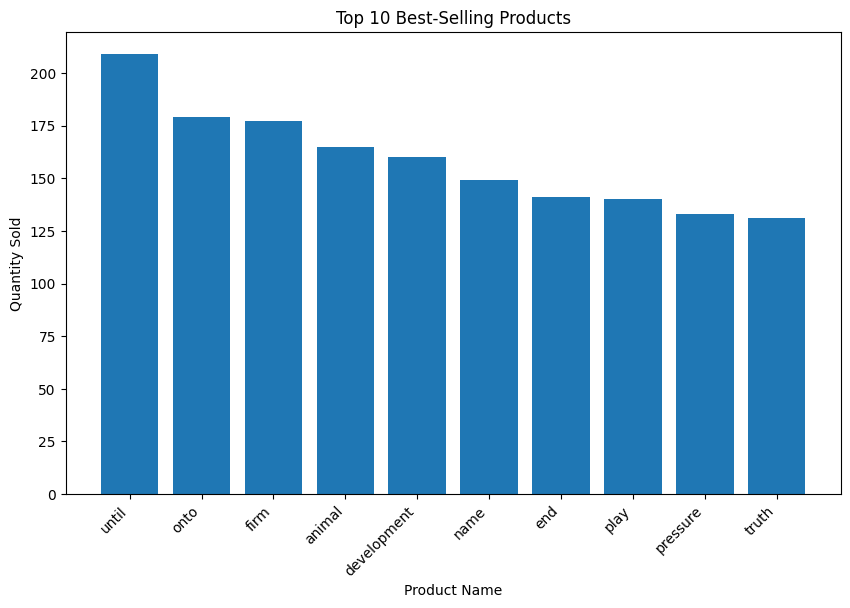

In [50]:
# Assuming you have a products DataFrame with 'product_id' and 'product_name' columns
# Join the order DataFrame with the products DataFrame on 'product_id'
df_order_products = df_order.join(df_product, on='product_id')

# Group by 'product_name' and sum up the 'quantity'
top_products_df = df_order_products.groupBy('product_name').agg({'quantity': 'sum'}).withColumnRenamed('sum(quantity)', 'total_quantity')

# Sort by 'total_quantity' in descending order and select the top 10
top_products_df = top_products_df.orderBy('total_quantity', ascending=False).limit(10)

# Collect the data to a list of rows
top_products = top_products_df.collect()

# Extract product names and quantities for plotting
product_names = [row['product_name'] for row in top_products]
quantities = [row['total_quantity'] for row in top_products]

# Plot the top 10 best-selling products
plt.figure(figsize=(10, 6))
plt.bar(product_names, quantities)
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45, ha="right")
plt.show()

### To analyze and visualize which product categories are most popular among different age groups of customers,

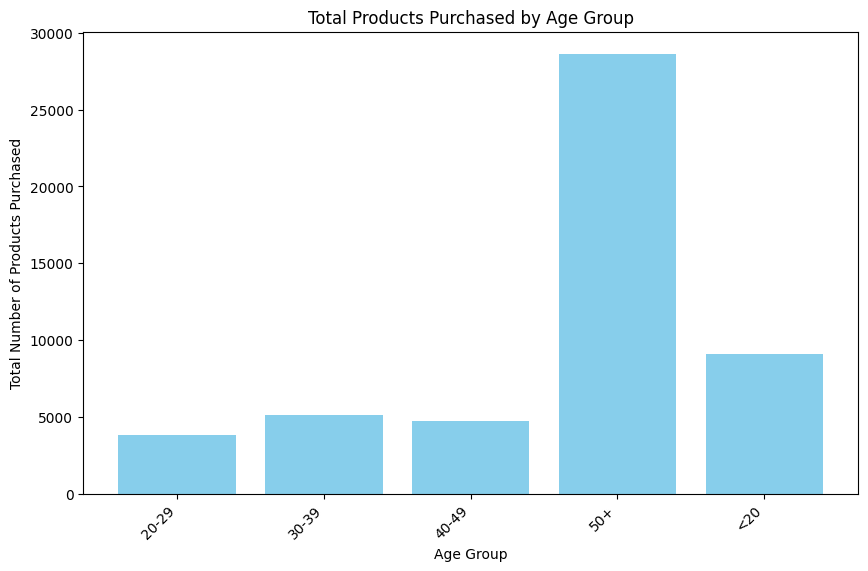

In [53]:
# Step 1: Calculate age and create age groups
current_year = 2024  # Use the appropriate year
df_customers = df_customer.withColumn("age", current_year - year(col("birth_date")))

df_customers = df_customers.withColumn(
    "age_group", 
    when(col("age") < 20, "<20")
    .when((col("age") >= 20) & (col("age") < 30), "20-29")
    .when((col("age") >= 30) & (col("age") < 40), "30-39")
    .when((col("age") >= 40) & (col("age") < 50), "40-49")
    .otherwise("50+")
)

# Step 2: Join the tables: customers, orders, and order items
df_combined = df_customers.join(df_data, "customer_id") \
                          .join(df_order, "order_id")

# Step 3: Group by age_group and count the total number of products purchased
df_age_group_count = df_combined.groupBy("age_group") \
                                .agg({"quantity": "sum"}) \
                                .withColumnRenamed("sum(quantity)", "total_products_purchased")

# Step 4: Collect the data for plotting
age_group_data = df_age_group_count.orderBy("age_group").collect()

# Prepare data for plotting
age_groups = [row['age_group'] for row in age_group_data]
total_products_purchased = [row['total_products_purchased'] for row in age_group_data]

# Step 5: Plotting
plt.figure(figsize=(10, 6))
plt.bar(age_groups, total_products_purchased, color='skyblue')

plt.title("Total Products Purchased by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Number of Products Purchased")
plt.xticks(rotation=45, ha="right")
plt.show()
